In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans
from matplotlib import cm, colormaps
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D


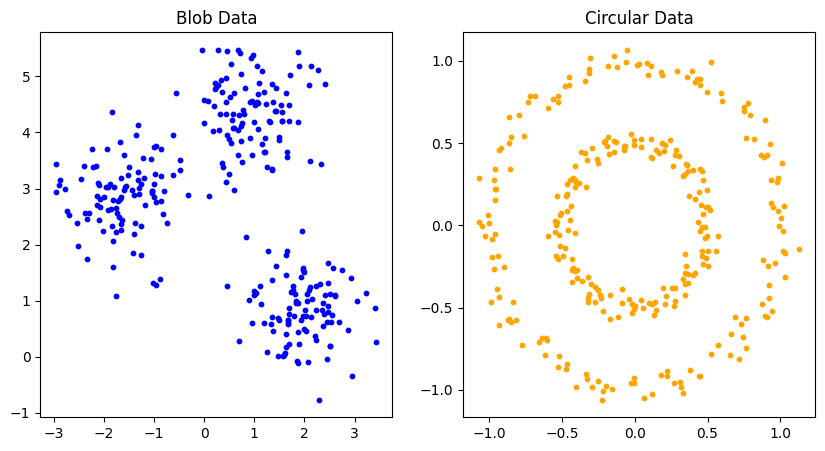

In [7]:
# Simulate blob data
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Simulate circular data
X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Plot the datasets
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c='blue', s=10)
ax[0].set_title('Blob Data')
ax[1].scatter(X_circles[:, 0], X_circles[:, 1], c='orange', s=10)
ax[1].set_title('Circular Data')
plt.show()

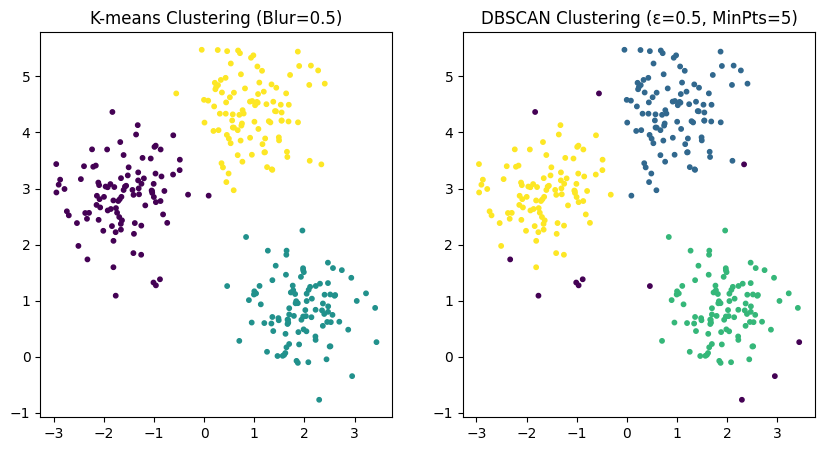

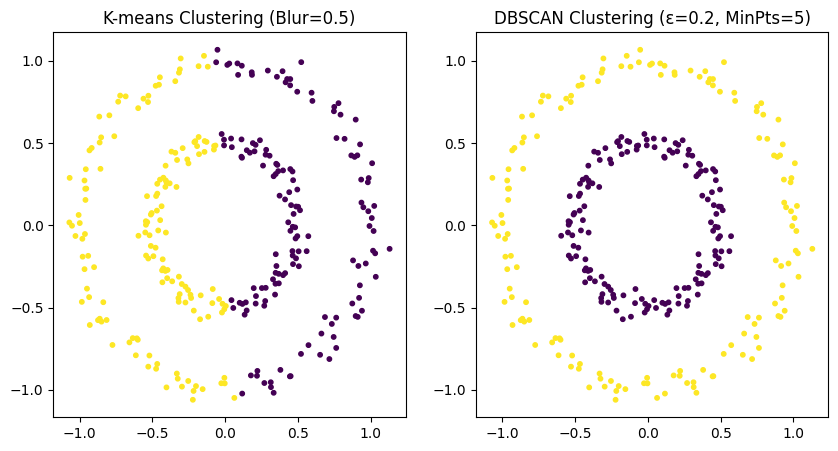

In [9]:

def run_clustering(X, blur=0.5, epsilon=0.5, min_samples=5, n_clusters=3):
    # K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels_kmeans = kmeans.labels_

    # DBSCAN
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
    labels_dbscan = dbscan.labels_

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=10)
    ax[0].set_title(f'K-means Clustering (Blur={blur})')
    ax[1].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=10)
    ax[1].set_title(f'DBSCAN Clustering (ε={epsilon}, MinPts={min_samples})')
    plt.show()
    
# Apply clustering to blob data
run_clustering(X_blobs, blur=0.5, epsilon=0.5, min_samples=5, n_clusters=3)

# Apply clustering to circular data
run_clustering(X_circles, blur=0.5, epsilon=0.2, min_samples=5, n_clusters=2)

var2

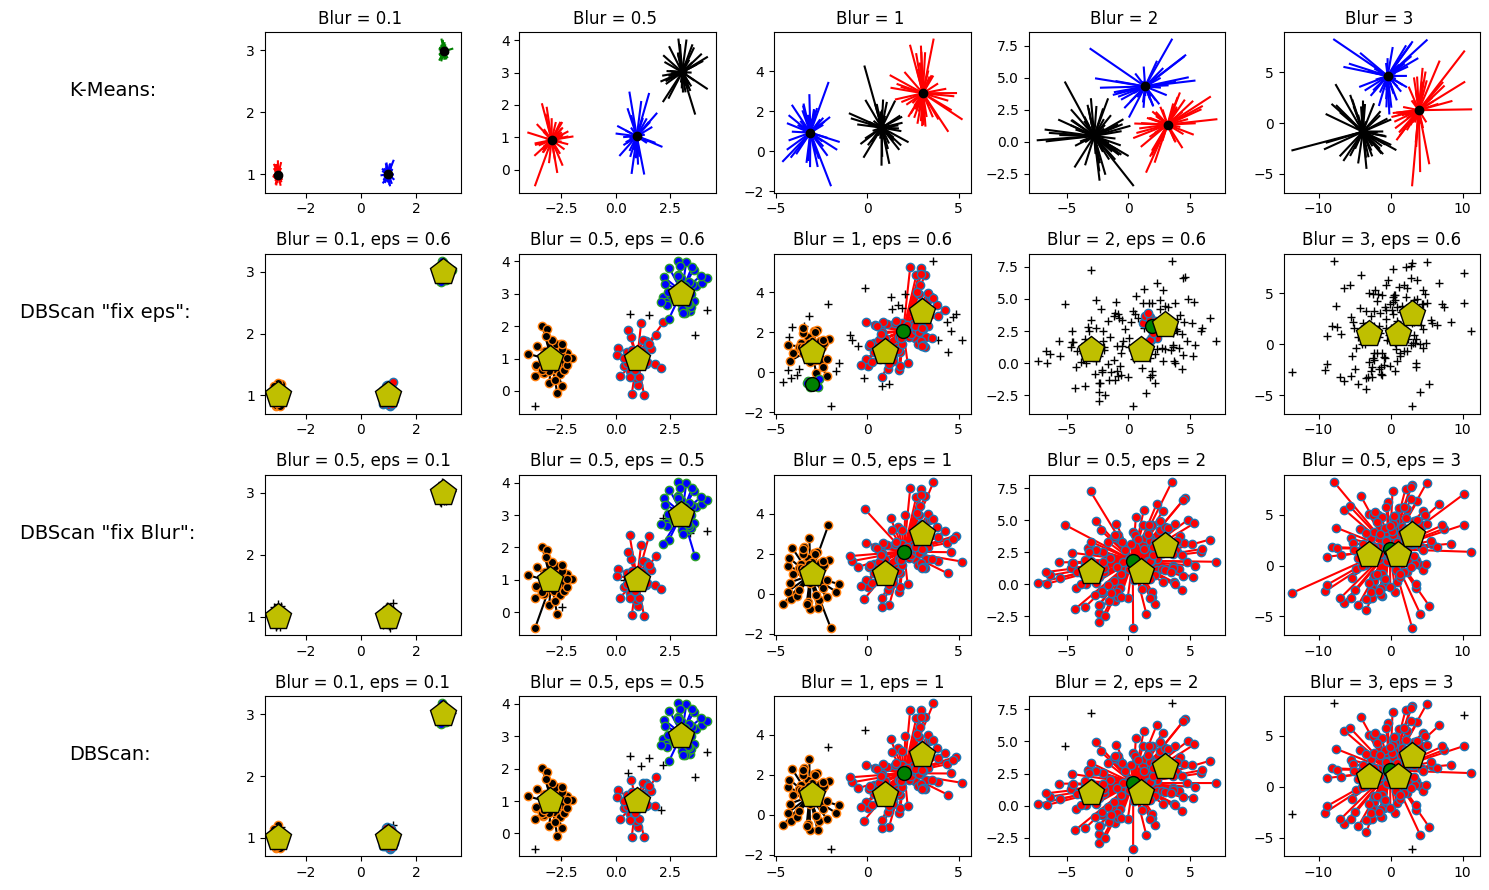

In [13]:
 
fig,ax = plt.subplots(4,6,figsize=(15,9))
ax = ax.flatten()
 
lineColors = 'rgbgmrkbgm';
 
blur_level=[0.1, 0.5, 1, 2, 3]
 
for k in range(6):
    if k == 0: 
        ax[k].axis('off')
        ax[k].annotate('K-Means:', xy=(0.3, 0.6), size=14)
        ax[k+6].axis('off')
        ax[k+6].annotate('DBScan "fix eps":', xy=(0.05, 0.6), size=14)
        ax[k+12].axis('off')
        ax[k+12].annotate('DBScan "fix Blur":', xy=(0.05, 0.6), size=14)
        ax[k+18].axis('off')
        ax[k+18].annotate('DBScan:', xy=(0.3, 0.6), size=14)
        continue    
            
    nPerClust = 50
 
    # blur around centroid (std units)
    blur = blur_level[k-1]
 
    # XY centroid locations
    A = [  1, 1 ]
    B = [ -3, 1 ]
    C = [  3, 3 ]
 
    # generate data
    a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
    b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
    c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]
 
    # concatanate into a list
    data = np.transpose( np.concatenate((a,b,c),axis=1) )
    
    kmeans = KMeans(n_clusters=3).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    #ax[k].set_xticks([])
    #ax[k].set_yticks([])
    ax[k].set_title('Blur = %g '%(blur))
    
    
    clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
    groupidx = clustmodel.labels_
 
    # number of clusters
    nclust = max(groupidx)+1 # +1 for indexing
 
    # compute cluster centers
    cents = np.zeros((nclust,2))
    for ci in range(nclust):
        cents[ci,0] = np.mean(data[groupidx==ci,0])
        cents[ci,1] = np.mean(data[groupidx==ci,1])
    #print(cents)
 
    # draw lines from each data point to the centroids of each cluster
    lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
    for i in range(len(data)):
        if groupidx[i]==-1:
            ax[k+6].plot(data[i,0],data[i,1],'k+')
        else:
            ax[k+6].plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
 
 
    # now draw the raw data in different colors
    for i in range(nclust):
        ax[k+6].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
 
    # and now plot the centroid locations
    ax[k+6].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
    #ax[k].title('Result of dbscan clustering (k=' + str(nclust) + ')')
 
    # finally, the "ground-truth" centers
    ax[k+6].plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+6].plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+6].plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+6].set_title('Blur = %g, eps = 0.6'%(blur))
    
    
 
    blur_scan = 0.5
 
    # generate data
    a_scan = [ A[0]+np.random.randn(nPerClust)*blur_scan , A[1]+np.random.randn(nPerClust)*blur_scan ]
    b_scan = [ B[0]+np.random.randn(nPerClust)*blur_scan , B[1]+np.random.randn(nPerClust)*blur_scan ]
    c_scan = [ C[0]+np.random.randn(nPerClust)*blur_scan , C[1]+np.random.randn(nPerClust)*blur_scan ]
 
    # concatanate into a list
    data_scan = np.transpose( np.concatenate((a_scan,b_scan,c_scan),axis=1) )
 
    eps_k = blur_level[k-1]
    clustmodel = DBSCAN(eps=eps_k,min_samples=6).fit(data_scan)
    groupidx = clustmodel.labels_
 
    # number of clusters
    nclust = max(groupidx)+1 # +1 for indexing
 
    # compute cluster centers
    cents = np.zeros((nclust,2))
    for ci in range(nclust):
        cents[ci,0] = np.mean(data[groupidx==ci,0])
        cents[ci,1] = np.mean(data[groupidx==ci,1])
    #print(cents)
 
    # draw lines from each data point to the centroids of each cluster
    lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
    for i in range(len(data)):
        if groupidx[i]==-1:
            ax[k+12].plot(data[i,0],data[i,1],'k+')
        else:
            ax[k+12].plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
 
 
    # now draw the raw data in different colors
    for i in range(nclust):
        ax[k+12].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
 
    # and now plot the centroid locations
    ax[k+12].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
    #ax[k].title('Result of dbscan clustering (k=' + str(nclust) + ')')
 
    # finally, the "ground-truth" centers
    ax[k+12].plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+12].plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+12].plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+12].set_title('Blur = %g, eps = %g'%(blur_scan, eps_k))
    
    
    
    
    eps_k = blur_level[k-1]
    clustmodel = DBSCAN(eps=eps_k,min_samples=6).fit(data)
    groupidx = clustmodel.labels_
 
    # number of clusters
    nclust = max(groupidx)+1 # +1 for indexing
 
    # compute cluster centers
    cents = np.zeros((nclust,2))
    for ci in range(nclust):
        cents[ci,0] = np.mean(data[groupidx==ci,0])
        cents[ci,1] = np.mean(data[groupidx==ci,1])
    #print(cents)
 
    # draw lines from each data point to the centroids of each cluster
    lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
    for i in range(len(data)):
        if groupidx[i]==-1:
            ax[k+18].plot(data[i,0],data[i,1],'k+')
        else:
            ax[k+18].plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
 
 
    # now draw the raw data in different colors
    for i in range(nclust):
        ax[k+18].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
 
    # and now plot the centroid locations
    ax[k+18].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
    #ax[k].title('Result of dbscan clustering (k=' + str(nclust) + ')')
 
    # finally, the "ground-truth" centers
    ax[k+18].plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+18].plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+18].plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+18].set_title('Blur = %g, eps = %g'%(blur, eps_k))
plt.tight_layout()